***POSTTEST 6***

Nama : Arif Wijaksono

Nim : 2109106129

***Import Library Yang Di Gunakan***

Link Drive:https://drive.google.com/file/d/15ls7zvwLXqwn662OXkCoq7cglbqcf1PS/view?usp=drive_link

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

***Menampilkan Dataset***

In [29]:
df = pd.read_csv('Customer-Churn-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


***Preprocessing dataset***t

***Encoding target***

In [30]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [40]:
# Pilih atribut yang dianggap memengaruhi hasil prediksi
selected_features = ['Age', 'Tenure', 'Balance']
X = df[selected_features]
y = df['Gender']

***Split dataset menjadi train dan test***

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Membuat model sequential***

In [42]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                256       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

***Callback***

Callback untuk menghentikan pelatihan jika tidak ada perbaikan pada validation loss

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Callback untuk menyimpan model terbaik berdasarkan validation loss

In [45]:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

***Pelatihan model***

In [46]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
100/100 [==============================] - 2s 8ms/step - loss: 85.3123 - accuracy: 0.5103 - val_loss: 22.1273 - val_accuracy: 0.4762
Epoch 2/100
 23/100 [=====>........................] - ETA: 0s - loss: 8.2585 - accuracy: 0.5462 

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 1s 6ms/step - loss: 11.5809 - accuracy: 0.5083 - val_loss: 8.4859 - val_accuracy: 0.5569
Epoch 3/100
100/100 [==============================] - 1s 8ms/step - loss: 11.7875 - accuracy: 0.5117 - val_loss: 43.3628 - val_accuracy: 0.4762
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 9.7954 - accuracy: 0.5213 - val_loss: 17.2520 - val_accuracy: 0.5562
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 9.3439 - accuracy: 0.5228 - val_loss: 13.7662 - val_accuracy: 0.4762
Epoch 6/100
100/100 [==============================] - 1s 8ms/step - loss: 11.6488 - accuracy: 0.5192 - val_loss: 19.6261 - val_accuracy: 0.5562
Epoch 7/100
100/100 [==============================] - 1s 7ms/step - loss: 12.3554 - accuracy: 0.5120 - val_loss: 7.9151 - val_accuracy: 0.5569
Epoch 8/100
100/100 [==============================] - 1s 6ms/step - loss: 16.4258 - accuracy: 0.5098 - val_loss: 26.0836 - val_accuracy: 0.4762
E

In [47]:
# Load model terbaik
model = keras.models.load_model('best_model.h5')

***Evaluasi Model***

In [48]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

63/63 [==============================] - 0s 3ms/step - loss: 0.8935 - accuracy: 0.5490
Test Loss: 0.8935
Test Accuracy: 0.5490


***Dibawah ini adalah grafik perbandingan accuracy dan loss dari train dan test***

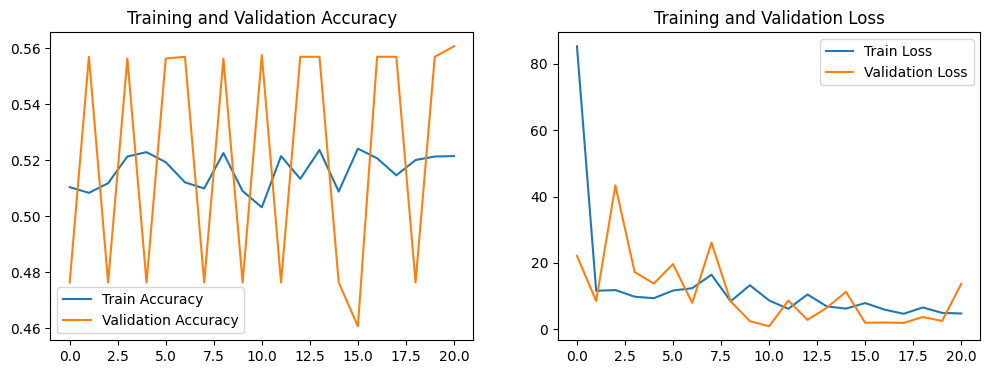

In [49]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()